# Assignment Part - I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

## Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 300)

pd.options.display.float_format = '{:,.4f}'.format

## Step 1: Reading and Understanding of data

In [3]:
# Reading the data into a dataframe

house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.0000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.0000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.0000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.0000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.0000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Shape of the dataframe

house.shape

(1460, 81)

#### Observations:

- There are a total of 1460 rows and 80 predictor variables.
- SalePrice is the response variable.

In [5]:
# data types of the columns

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Observations: 

- Some of the columns have more rows missing.
- It has int, float, and object data types.

In [6]:
# Statistical measures of numerical columns

house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.0000","1,460.0000","1,201.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,452.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,379.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000"
mean,730.5000,56.8973,70.0500,"10,516.8281",6.0993,5.5753,"1,971.2678","1,984.8658",103.6853,443.6397,46.5493,567.2404,"1,057.4295","1,162.6267",346.9925,5.8445,"1,515.4637",0.4253,0.0575,1.5651,0.3829,2.8664,1.0466,6.5178,0.6130,"1,978.5062",1.7671,472.9801,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,43.4890,6.3219,"2,007.8158","180,921.1959"
std,421.6100,42.3006,24.2848,"9,981.2649",1.3830,1.1128,30.2029,20.6454,181.0662,456.0981,161.3193,441.8670,438.7053,386.5877,436.5284,48.6231,525.4804,0.5189,0.2388,0.5509,0.5029,0.8158,0.2203,1.6254,0.6447,24.6897,0.7473,213.8048,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,496.1230,2.7036,1.3281,"79,442.5029"
min,1.0000,20.0000,21.0000,"1,300.0000",1.0000,1.0000,"1,872.0000","1,950.0000",0.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,"1,900.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,"2,006.0000","34,900.0000"
25%,365.7500,20.0000,59.0000,"7,553.5000",5.0000,5.0000,"1,954.0000","1,967.0000",0.0000,0.0000,0.0000,223.0000,795.7500,882.0000,0.0000,0.0000,"1,129.5000",0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,"1,961.0000",1.0000,334.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,"2,007.0000","129,975.0000"
50%,730.5000,50.0000,69.0000,"9,478.5000",6.0000,5.0000,"1,973.0000","1,994.0000",0.0000,383.5000,0.0000,477.5000,991.5000,"1,087.0000",0.0000,0.0000,"1,464.0000",0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,6.0000,1.0000,"1,980.0000",2.0000,480.0000,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,"2,008.0000","163,000.0000"
75%,"1,095.2500",70.0000,80.0000,"11,601.5000",7.0000,6.0000,"2,000.0000","2,004.0000",166.0000,712.2500,0.0000,808.0000,"1,298.2500","1,391.2500",728.0000,0.0000,"1,776.7500",1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,7.0000,1.0000,"2,002.0000",2.0000,576.0000,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,"2,009.0000","214,000.0000"
max,"1,460.0000",190.0000,313.0000,"215,245.0000",10.0000,9.0000,"2,010.0000","2,010.0000","1,600.0000","5,644.0000","1,474.0000","2,336.0000","6,110.0000","4,692.0000","2,065.0000",572.0000,"5,642.0000",3.0000,2.0000,3.0000,2.0000,8.0000,3.0000,14.0000,3.0000,"2,010.0000",4.0000,"1,418.0000",857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,"15,500.0000",12.0000,"2,010.0000","755,000.0000"


#### Observation: 

- Many columns have a huge difference between the 75th percentile value and the maximum value. Let's analyse them clearly further using box plots, as there may be outliers present in the data.

In [7]:
# check for duplicate data

house[house.duplicated()].shape

(0, 81)

#### Observation:

- There are no duplicate records in the data.

### Step 2: Data Cleaning

#### 2.1 Removing redundant columns based on unique values

In [8]:
# Defining function to identify the features with a single value percentage greater than 85%

def per_of_single_value():   # more percentage of single value
    red_col=[]
    for col in house.columns:
        if(house[col].value_counts(normalize=True).max()>=0.85):
            red_col.append(col)
    return red_col

redundant_col = per_of_single_value() # Function calling

print(redundant_col)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'SaleType']


In [9]:
# Dropping the above identified columns as they are not useful for model building

house = house.drop(redundant_col, axis=1)
house.shape

(1460, 53)

In [10]:
# Dropping ID column also, as that is not insightful for model building

house = house.drop('Id', axis=1)
house.shape

(1460, 52)

#### 2.2 Missing values Treatment

In [11]:
# Missing values percentage 

house_null = (house.isnull().sum()/len(house.index)).sort_values(ascending=False)[house.isnull().sum()>0] * 100
house_null

PoolQC         99.5205
Alley          93.7671
Fence          80.7534
MasVnrType     59.7260
FireplaceQu    47.2603
LotFrontage    17.7397
GarageYrBlt     5.5479
GarageType      5.5479
GarageFinish    5.5479
BsmtExposure    2.6027
BsmtQual        2.5342
BsmtFinType1    2.5342
MasVnrArea      0.5479
dtype: float64

In [12]:
# Idetifying columns that has more than 40% of the missing values column wise

house_null_m40  = list(house_null[house_null > 40].index)
house_null_m40

['PoolQC', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

In [13]:
# Dropping the above columns as they don't provide much information because most of the data is missing

house = house.drop(house_null_m40, axis=1)
house.shape

(1460, 47)

In [14]:
# Idetifying columns that has more than 0% and less than 40% of the missing values column wise

house_null_m0  = list(house_null[(house_null < 40) & (house_null > 0)].index)
print(house_null_m0)

['LotFrontage', 'GarageYrBlt', 'GarageType', 'GarageFinish', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'MasVnrArea']


In [15]:
# Treating LotFrontage column

house['LotFrontage'].describe()

count   1,201.0000
mean       70.0500
std        24.2848
min        21.0000
25%        59.0000
50%        69.0000
75%        80.0000
max       313.0000
Name: LotFrontage, dtype: float64

 - Mean and Median are very close to each other, but I will choose Median to replace it as the median will not be affected by outliers.

In [16]:
# Replace missing values in LotFrontage

house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())

In [17]:
# Treating MasVnrArea column

house['MasVnrArea'].describe()

count   1,452.0000
mean      103.6853
std       181.0662
min         0.0000
25%         0.0000
50%         0.0000
75%       166.0000
max     1,600.0000
Name: MasVnrArea, dtype: float64

 - The mean is 100, and the median is 0. but I will choose median to replace it as median will not be affected by outliers.

In [18]:
# Replace missing values in MasVnrArea

house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].median())

In [19]:
house_null_m0

['LotFrontage',
 'GarageYrBlt',
 'GarageType',
 'GarageFinish',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'MasVnrArea']

In [20]:
# Treating Garage related columns

house[['GarageYrBlt', 'GarageType', 'GarageFinish','GarageArea']].loc[house['GarageYrBlt'].isnull()>0]

,GarageYrBlt,GarageType,GarageFinish,GarageArea
39,NaN,NaN,NaN,0
48,NaN,NaN,NaN,0
78,NaN,NaN,NaN,0
88,NaN,NaN,NaN,0
89,NaN,NaN,NaN,0
99,NaN,NaN,NaN,0
108,NaN,NaN,NaN,0
125,NaN,NaN,NaN,0
127,NaN,NaN,NaN,0
140,NaN,NaN,NaN,0


 - As the same rows are missing for all the columns and GarageArea is '0'. It indicates that there is no basement. So, I will replace the missing values in all columns as 'NA' - means No Garage.

In [21]:
# Replacing all the missing values with 'NA' except the GarageYrBlt 
# as I want it keep it as numerical data type for analysing in the later part 

house[['GarageType', 'GarageFinish']] = house[['GarageType', 'GarageFinish']].fillna('NA')

In [22]:
# Imputing missing values in GarageYrBlt with 0

house['GarageYrBlt'] = house['GarageYrBlt'].fillna(0)

# Changing its data type to int

house['GarageYrBlt'] = house['GarageYrBlt'].astype('int')

In [23]:
house_null_m0

['LotFrontage',
 'GarageYrBlt',
 'GarageType',
 'GarageFinish',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'MasVnrArea']

In [24]:
# Treating Basement related columns

house[['BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF']].loc[house['BsmtQual'].isnull()>0]

,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,0,0,0
39,NaN,NaN,NaN,0,0,0
90,NaN,NaN,NaN,0,0,0
102,NaN,NaN,NaN,0,0,0
156,NaN,NaN,NaN,0,0,0
182,NaN,NaN,NaN,0,0,0
259,NaN,NaN,NaN,0,0,0
342,NaN,NaN,NaN,0,0,0
362,NaN,NaN,NaN,0,0,0
371,NaN,NaN,NaN,0,0,0


 - As the same rows are missing for all the columns and there is '0' in 'BsmtFinSF1','BsmtUnfSF','TotalBsmtSF', it indicates there is no basement. So, I will replace the missing values in all columns as 'NA' - No Basement

In [25]:
# Replace missing values in above columns with NA

house[['BsmtQual','BsmtExposure','BsmtFinType1']] = house[['BsmtQual','BsmtExposure','BsmtFinType1']].fillna('NA')

In [26]:
(house.isnull().sum()).sum()

0

All the missign values have been imputed with relevant values

#### 2.3 Derived columns

In [27]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [28]:
# Identifying year columns

year_col =['YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold']

In [29]:
house[year_col].loc[house.YearBuilt == house.YearRemodAdd]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003,2008
1,1976,1976,1976,2007
4,2000,2000,2000,2008
7,1973,1973,1973,2009
10,1965,1965,1965,2008
...,...,...,...,...
1449,1970,1970,0,2006
1450,1974,1974,0,2009
1452,2005,2005,2005,2006
1453,2006,2006,0,2006


In [30]:
# Creating new columns age from the year columns given in the data

house['house_age'] = house['YrSold'] - house['YearBuilt'] 
house['remodel_age'] = house['YrSold'] - house['YearRemodAdd']

 - As GarageYrBlt has 0 in it, which indicates there is no garage, I will take a different approach to creating a new column.

In [31]:
# Defining a fuction to determine whether the garage is old or new, 0 indicates old and 1 indicates new
# As there is no garage for some of the houses, i will be treating them as old built.

def garge(x):
    if x['GarageYrBlt']==0:
        return 0
    elif x['GarageYrBlt'] < 2000:
        return 0
    else:
        return 1
house['garage_status'] = house.apply(garge, axis=1)

In [32]:
# Dropping Year related columns as we have age of the houses

house = house.drop(year_col, axis=1)

In [33]:
house.shape

(1460, 46)

### 2.4 Outliers treatment

In [34]:
cont_var = ['LotFrontage', 'LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 
            'GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF','SalePrice','house_age','remodel_age']

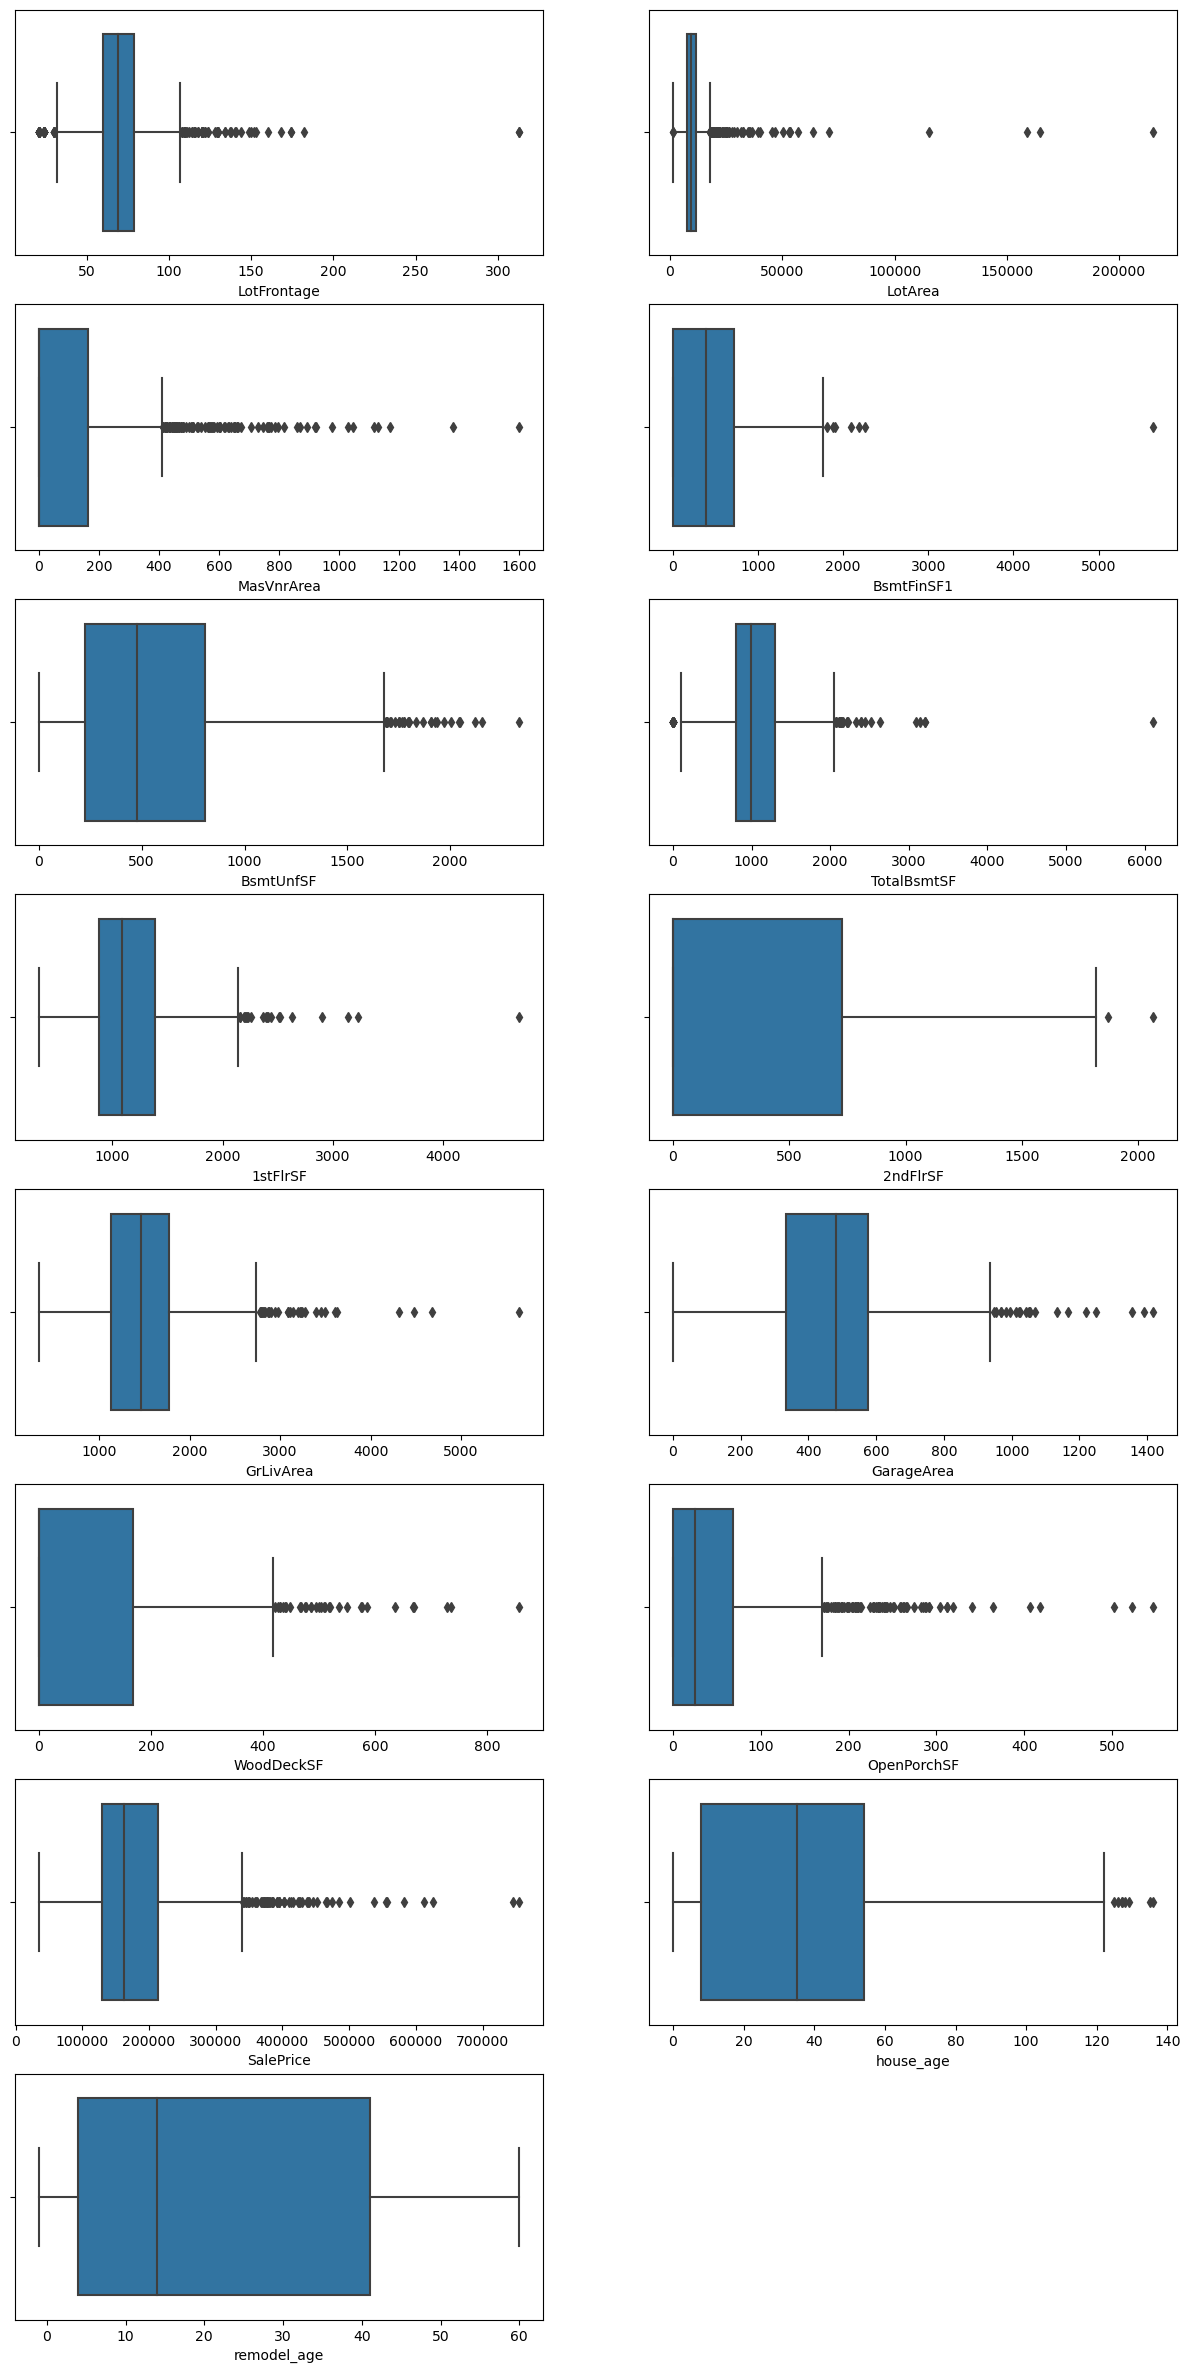

In [35]:
# Plotting boxplots for the above variables to identify outliers

plt.figure(figsize=(15,30))

for i, k in enumerate(cont_var):
    plt.subplot(8,2,i+1)
    sns.boxplot(x=k, data=house)
plt.show() 

In [36]:
house[cont_var].describe(percentiles=[.25,.5,.75,.90,.95,0.98,.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,house_age,remodel_age
count,"1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000","1,460.0000"
mean,69.8637,"10,516.8281",103.1171,443.6397,567.2404,"1,057.4295","1,162.6267",346.9925,"1,515.4637",472.9801,94.2445,46.6603,"180,921.1959",36.5479,22.9500
std,22.0277,"9,981.2649",180.7314,456.0981,441.8670,438.7053,386.5877,436.5284,525.4804,213.8048,125.3388,66.2560,"79,442.5029",30.2502,20.6407
min,21.0000,"1,300.0000",0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,334.0000,0.0000,0.0000,0.0000,"34,900.0000",0.0000,-1.0000
25%,60.0000,"7,553.5000",0.0000,0.0000,223.0000,795.7500,882.0000,0.0000,"1,129.5000",334.5000,0.0000,0.0000,"129,975.0000",8.0000,4.0000
50%,69.0000,"9,478.5000",0.0000,383.5000,477.5000,991.5000,"1,087.0000",0.0000,"1,464.0000",480.0000,0.0000,25.0000,"163,000.0000",35.0000,14.0000
75%,79.0000,"11,601.5000",164.2500,712.2500,808.0000,"1,298.2500","1,391.2500",728.0000,"1,776.7500",576.0000,168.0000,68.0000,"214,000.0000",54.0000,41.0000
90%,92.0000,"14,381.7000",335.0000,"1,065.5000","1,232.0000","1,602.2000","1,680.0000",954.2000,"2,158.3000",757.1000,262.0000,130.0000,"278,000.0000",84.0000,56.0000
95%,104.0000,"17,401.1500",456.0000,"1,274.0000","1,468.0000","1,753.0000","1,831.2500","1,141.0500","2,466.1000",850.1000,335.0000,175.0500,"326,100.0000",91.0000,58.0000
98%,120.8200,"25,251.6200",650.8200,"1,442.6400","1,678.2000","2,001.6400","2,072.2800","1,318.5600","2,782.3800",907.4600,430.1000,240.8200,"394,931.0600",100.0000,59.0000


In [37]:
# Deleting outliers as they will effect the analysis

house = house[house.LotArea <= house.LotArea.quantile(0.98)]
house = house[house.MasVnrArea <= house.MasVnrArea.quantile(0.99)]
house = house[house.BsmtFinSF1 <= house.BsmtFinSF1.quantile(0.99)]
house = house[house.TotalBsmtSF <= house.TotalBsmtSF.quantile(0.99)]
house = house[house['1stFlrSF'] <= house['1stFlrSF'].quantile(0.99)]
house = house[house.GrLivArea <= house.GrLivArea.quantile(0.99)]
house = house[house.WoodDeckSF <= house.WoodDeckSF.quantile(0.99)]
house = house[house.OpenPorchSF <= house.OpenPorchSF.quantile(0.99)]

In [39]:
house.shape

(1330, 46)

#### 2.5 Converting some graded categorical column into numerical

In [40]:
# Identifying categorical columns which can be converted into numerical columns, 
# as this will reduce the number of dummy varibales creation

cat_to_num = ['ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual']

In [41]:
# Converting the above identified columns into numerical

house['ExterQual'] = house['ExterQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex' : 5})
house['BsmtQual'] = house['BsmtQual'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex' : 5})
house['BsmtExposure'] = house['BsmtExposure'].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
house['BsmtFinType1'] = house['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4,'ALQ':5, 'GLQ':6})
house['HeatingQC'] = house['HeatingQC'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex' : 5})
house['KitchenQual'] = house['KitchenQual'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex' : 5})

In [42]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1330 entries, 0 to 1458
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1330 non-null   int64  
 1   MSZoning       1330 non-null   object 
 2   LotFrontage    1330 non-null   float64
 3   LotArea        1330 non-null   int64  
 4   LotShape       1330 non-null   object 
 5   LotConfig      1330 non-null   object 
 6   Neighborhood   1330 non-null   object 
 7   BldgType       1330 non-null   object 
 8   HouseStyle     1330 non-null   object 
 9   OverallQual    1330 non-null   int64  
 10  OverallCond    1330 non-null   int64  
 11  RoofStyle      1330 non-null   object 
 12  Exterior1st    1330 non-null   object 
 13  Exterior2nd    1330 non-null   object 
 14  MasVnrArea     1330 non-null   float64
 15  ExterQual      1330 non-null   int64  
 16  Foundation     1330 non-null   object 
 17  BsmtQual       1330 non-null   int64  
 18  BsmtExposure 

In [43]:
# Converting MSSubclass data type to object as it is a categorical variable

house['MSSubClass'] = house['MSSubClass'].astype('object')

In [44]:
# Changing Month sold value into categories

house['MoSold'] = house['MoSold'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',
                                      11:'Nov',12:'Dec'})

### Step 2: Exploratory Data Analysis

In [45]:
# Identifying continous numerical variables & Discrete numerical variables

cont_var = ['LotFrontage', 'LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 
            'GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF','SalePrice','house_age','remodel_age']

disc_var = ['OverallQual', 'OverallCond','ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1','HeatingQC','BsmtFullBath', 
            'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','garage_status']

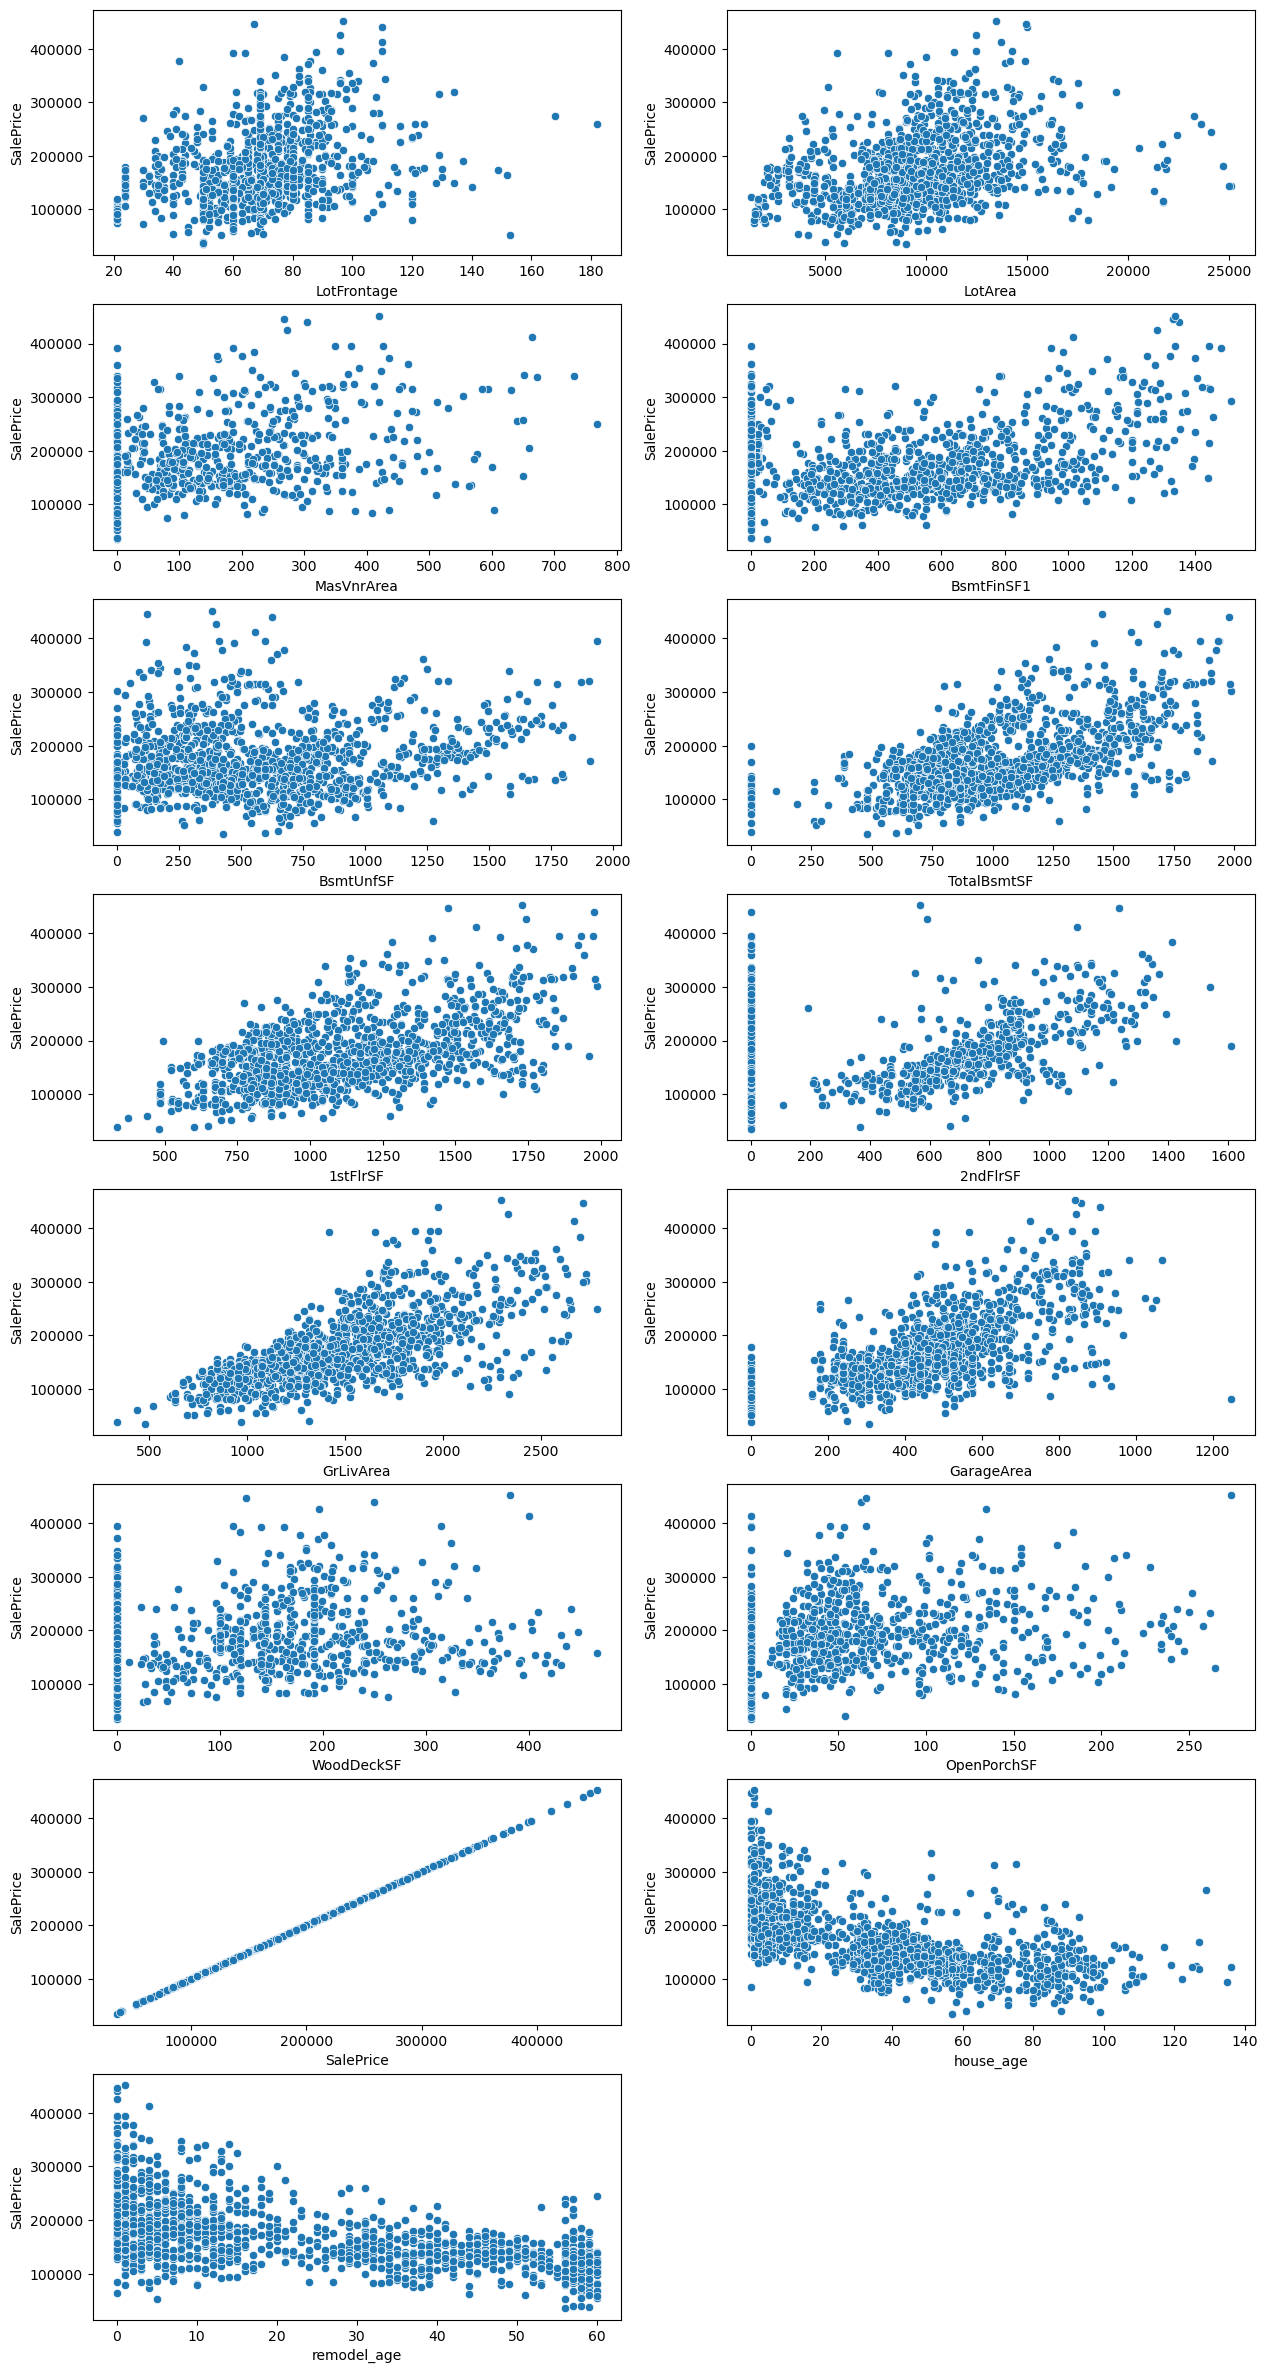

In [46]:
# Visualising how response variable 'SalePrice' is changing wrt continous numercail variables

plt.figure(figsize=(15,30))

for i, k in enumerate(cont_var):
    plt.subplot(8,2,i+1)
    sns.scatterplot(x=k, y='SalePrice', data=house)
plt.show()  

### Observations:

- Sales price shows a more linear trend with the following variables: BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea
- The older the house is, the lower the price.

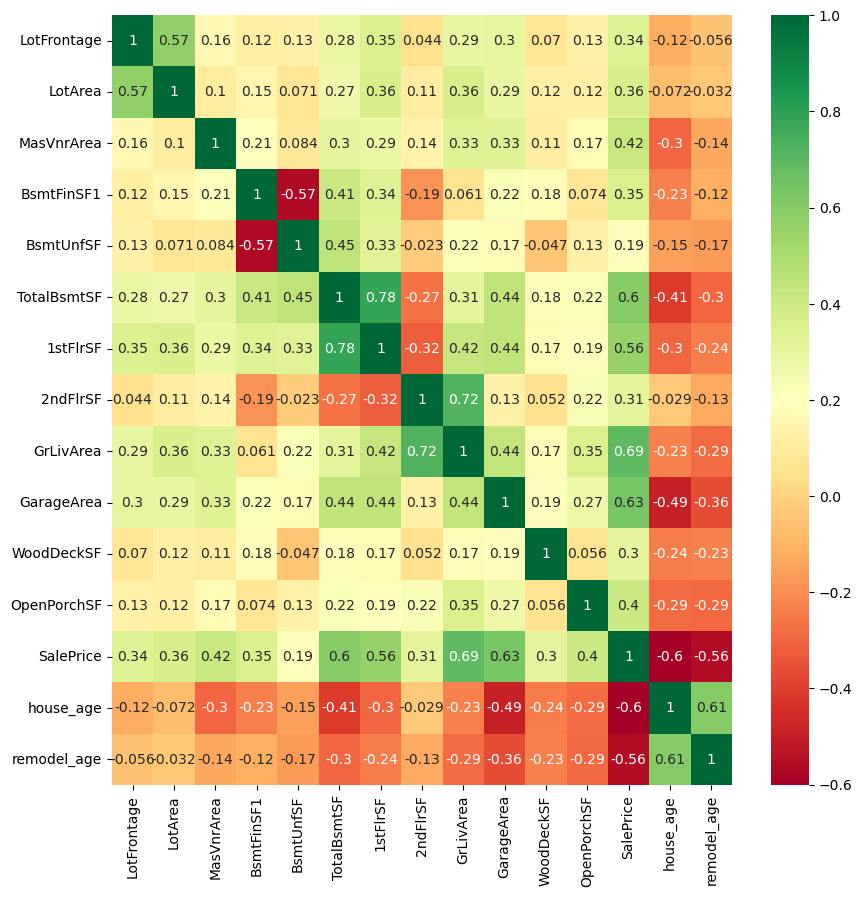

In [47]:
# Plotting correlation matrix to better uunderstand relationship between the predictor varibles and response variable

plt.figure(figsize=(10,10))

sns.heatmap(house[cont_var].corr(), annot=True, cmap='RdYlGn')
plt.show()

#### Observations:

- Sale Price is highly correlated with Total BsmtSF, 1st FlrSF, GrLivArea, and GarageArea.
- 1stFlrSF and TotalBsmtSF are highly correlated, which indicates multicollinearity.
- 2nd FlrSF and GrLivArea are highly correlated, which indicates multicollinearity.
- The sale price is negatively correlated with the age of the house.

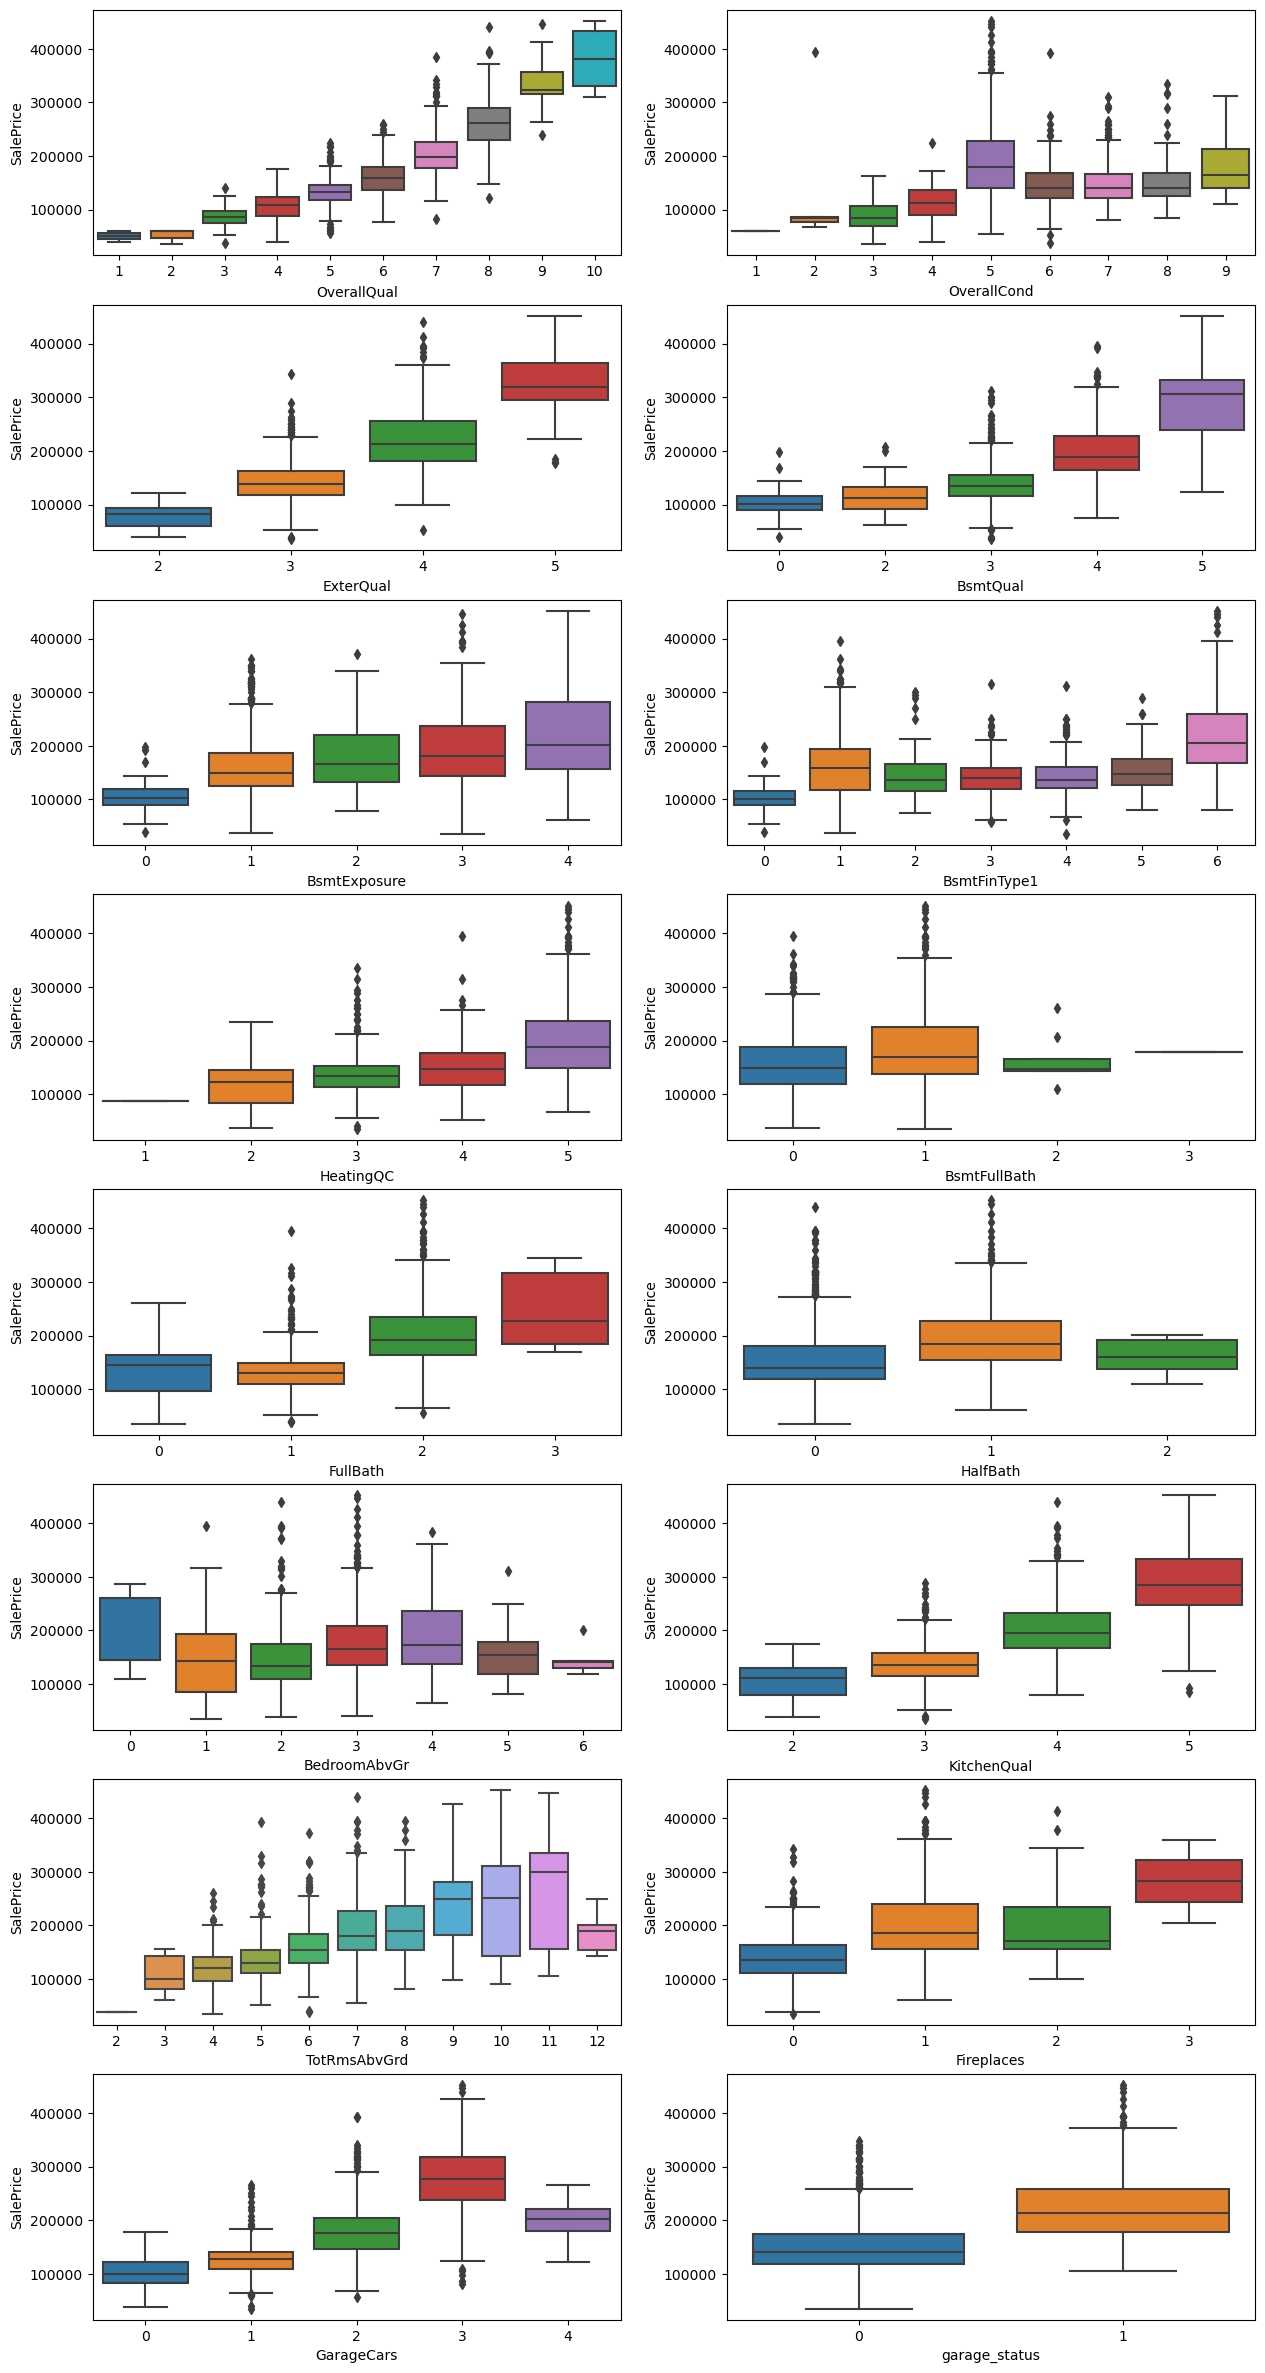

In [48]:
# Visualising how response variable 'SalePrice' is changing wrt discrete numerical variables

plt.figure(figsize=(15,30))

for i, k in enumerate(disc_var):
    plt.subplot(8,2,i+1)
    sns.boxplot(x=k, y='SalePrice', data=house)
plt.show()  

#### Observations

- High overall quality (including external, basment, etc.) and best-condition houses are at higher prices.
- More basement exposure results in a higher price for the building.
- Good-living quarters of basement-finished houses are priced more
- The number of full baths in a basement doesn't vary much.
- The more full baths above grade, the higher the house's price.
- A house with four bedrooms above grade is priced at higher rates. Interestingly, houses with 0 bedrooms also sell at higher rates.
- The total number of rooms above grade is greater than the price of the house.
- An increase in the number of fireplaces seems to increase the price of a house.
- A house with a garage that can fit three cars is priced at higher rates.
- The price of a house doesn't vary much based on the month in which it is sold.

In [49]:
# Categorical columns

cat_var = house.select_dtypes('object').columns
cat_var

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'GarageType', 'GarageFinish', 'MoSold', 'SaleCondition'],
      dtype='object')

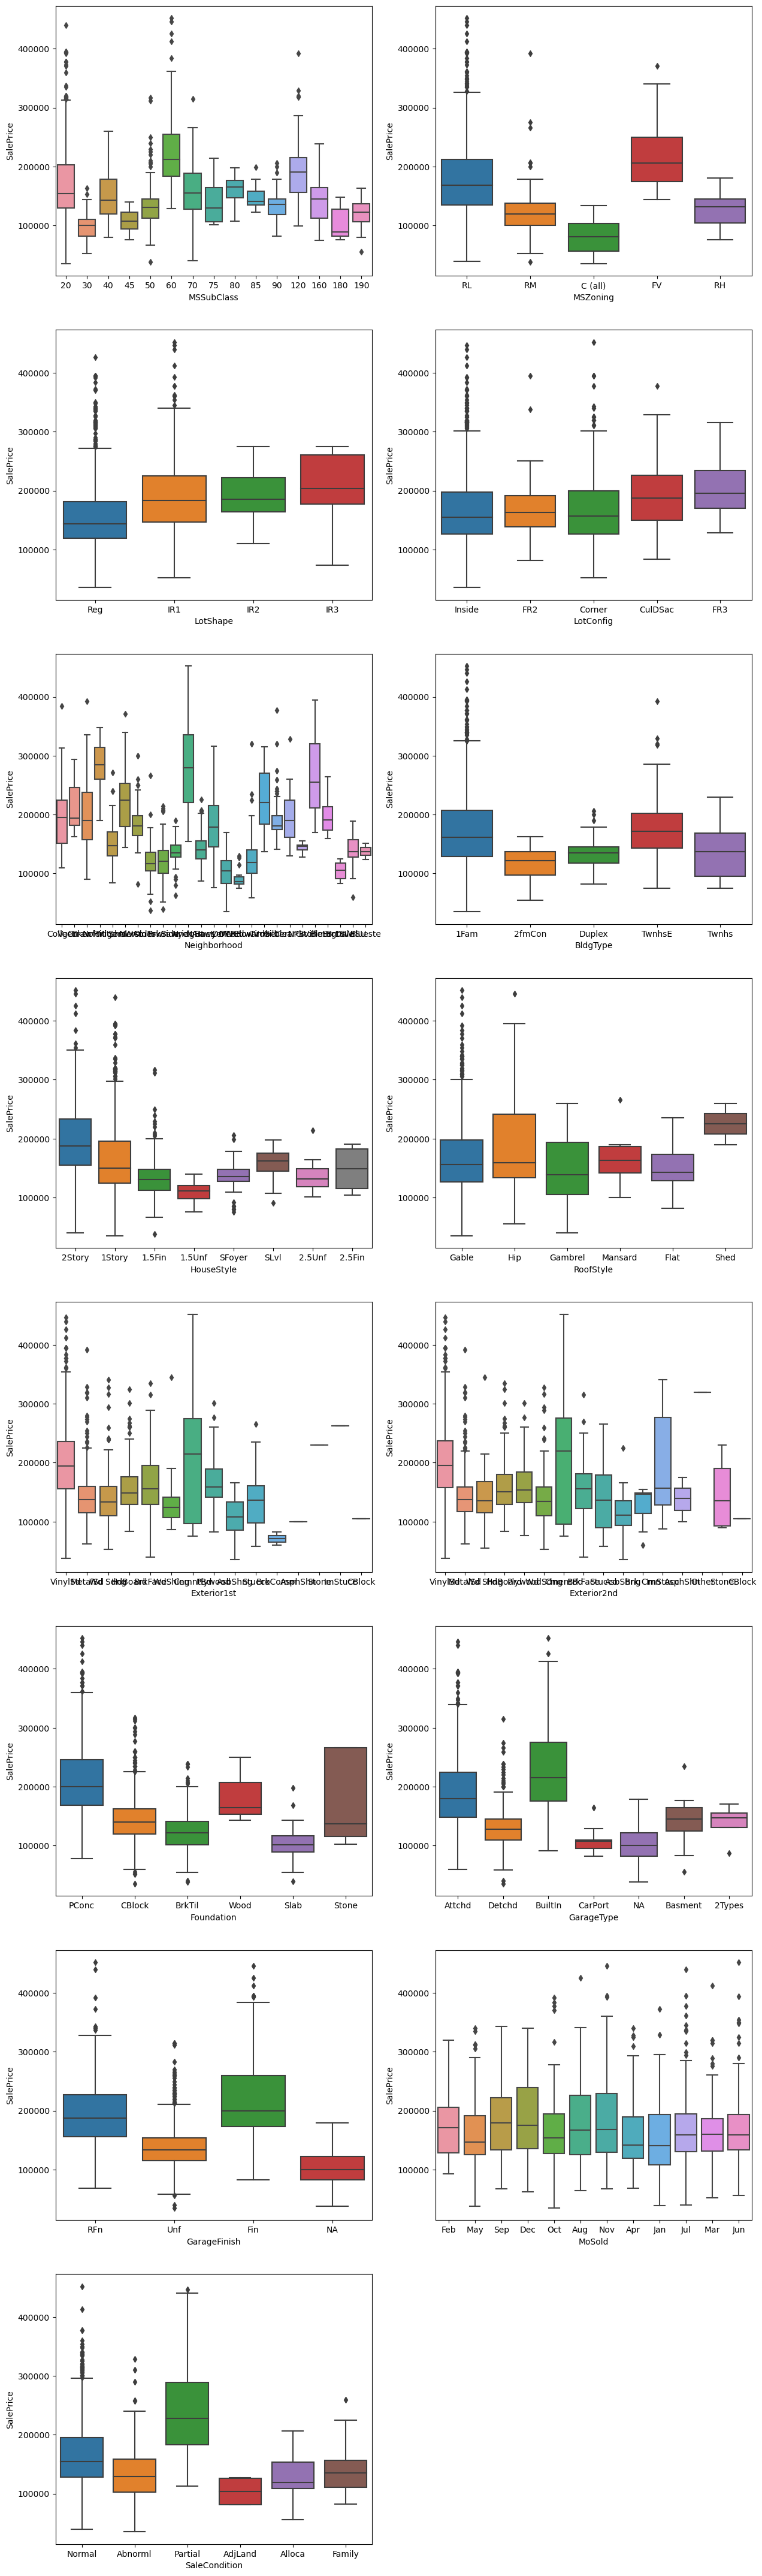

In [50]:
# Visualising Categorical Variables

plt.figure(figsize=(15,55))

for i, k in enumerate(cat_var):
    plt.subplot(8,2,i+1)
    sns.boxplot(x=k, y='SalePrice', data=house)
plt.show()

### Observations:

- There is variation in price across different MSSubClass and MSZoning
- 20, 60, and 120 MSSubClasses are at a higher price.
- FV is priced at higher rates.
- Lotshape and Lotconfig don't show much variation in the price across different shapes and configurations.
- The neighbourhood is definitely impacting the prices.
- Hip-style is having higher prices.
- Exterior coverings on houses are also impacting prices.
- Poured concrete, stone, and wood foundations are at higher prices.
- Built-in and in-house garages are in demand as they are clearly higher priced.
- Newly constructed homes are at a higher price.
- Sale condition as partial seems to have a higher price for a house.
- Months sold don't have an impact on the pricing.

### Step 3: Data Preparation for Modeling

#### 3.1 Creating Dummy variables

In [51]:
# Creating dummy columns for categorical variables by dropping first columns and appending prefix value to cloumn names

for i in cat_var:
    i = pd.get_dummies(data= house[i], prefix = i, drop_first=True, dtype=int)
    house = pd.concat([house, i], axis=1)

In [52]:
house.shape

(1330, 170)

In [53]:
# Deleting categorical variables as they are not need for model building

house = house.drop(cat_var, axis=1)
house.shape

(1330, 155)

- The final dataframe has 155 predictors, which is a huge number. I will proceed further and see how to choose a relevant predictor.

#### 3.2 Splitting the data into train and test

In [54]:
# splitting the entire data into 70% train data and 30% test data

df_train, df_test = train_test_split(house, train_size=0.7, test_size=0.3, random_state=100)

# Random state is specified as we need to get the same trian and test sets

print('shape of train data is', df_train.shape)
print('shape of test data is', df_test.shape)

shape of train data is (930, 155)
shape of test data is (399, 155)


#### 3.3 Rescaling using Normalisation technique

In [55]:
# I will resclae only continous numerical variables but not discrete numerical variables because we will loose interpretation power

num_var = cont_var

In [56]:
# 1.  Instiatite the object

scaler = MinMaxScaler()

# 2.  Fit on the data
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,house_age,remodel_age,garage_status,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
730,0.1118,0.1718,8,5,0.0000,4,4,1,6,0.7973,0.2145,0.8031,5,0.7756,0.0000,0.5233,1,2,0,2,4,5,1,2,0.4872,0.5086,0.5736,0.4896,0.1103,0.2333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1091,0.0186,0.0361,7,5,0.2760,4,4,1,4,0.3446,0.0465,0.3021,5,0.1754,0.3898,0.3747,1,2,1,2,4,4,0,2,0.3702,0.0000,0.1811,0.3034,0.0662,0.1333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
59,0.2422,0.2480,5,7,0.0000,3,3,3,5,0.4270,0.0765,0.3927,5,0.2698,0.0000,0.1820,0,1,0,2,3,4,0,1,0.2821,0.4206,0.0000,0.2180,0.2647,0.6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
737,0.3168,0.3851,8,5,0.0000,4,4,1,1,0.0000,0.4615,0.4496,5,0.3430,0.5587,0.5988,0,2,1,3,4,8,1,3,0.6410,0.0000,0.4377,0.4978,0.0074,0.0167,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0

### Step 4: Model Building

In [57]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('SalePrice')
X_train = df_train

### Approach:

- I will initially construct a model using all available columns and assess the metrics.
- Following that, I will adopt an automated approach, specifically recursive feature elimination (RFE), to identify the top-n features.
- After selecting the top features, I will use ridge and lasso regression techniques.

####  4.1 Linear Regression Model - 1 using all the features(variables)

In [58]:
X_train_lm_1 = sm.add_constant(X_train)
X_train_lm_1.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,house_age,remodel_age,garage_status,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
730,1.0000,0.1118,0.1718,8,5,0.0000,4,4,1,6,0.7973,0.2145,0.8031,5,0.7756,0.0000,0.5233,1,2,0,2,4,5,1,2,0.4872,0.5086,0.5736,0.1103,0.2333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1091,1.0000,0.0186,0.0361,7,5,0.2760,4,4,1,4,0.3446,0.0465,0.3021,5,0.1754,0.3898,0.3747,1,2,1,2,4,4,0,2,0.3702,0.0000,0.1811,0.0662,0.1333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
59,1.0000,0.2422,0.2480,5,7,0.0000,3,3,3,5,0.4270,0.0765,0.3927,5,0.2698,0.0000,0.1820,0,1,0,2,3,4,0,1,0.2821,0.4206,0.0000,0.2647,0.6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
737,1.0000,0.3168,0.3851,8,5,0.0000,4,4,1,1,0.0000,0.4615,0.4496,5,0.3430,0.5587,0.5988,0,2,1,3,4,8,1,3,0.6410,0.0000,0.4377,0.0074,0.0167,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0

In [59]:
# Create and fit first model 

lm_1 = sm.OLS(y_train,X_train_lm_1).fit()

In [60]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     62.83
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:33:29   Log-Likelihood:                 1585.5
No. Observations:                 930   AIC:                            -2875.
Df Residuals:                     782   BIC:                            -2159.
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.39

### Observations:

- The R-squared value is 92.2%, and the adjusted R-squared value is very close. This indicates that the model successfully explains 92.2% of the variance in the target variable, cnt.
- However, numerous coefficients have p-values exceeding the significance level, suggesting that the model is not deemed effective.

In [61]:
# Let's Check VIF values to confirm the above satement
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X_train_1 = X_train_lm_1.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
67,Neighborhood_NPkVill,inf
135,GarageFinish_NA,inf
80,BldgType_Duplex,inf
110,Exterior2nd_Brk Cmn,inf
39,MSSubClass_90,inf
134,GarageType_NA,inf
98,Exterior1st_CBlock,inf
112,Exterior2nd_CBlock,inf
15,GrLivArea,"2,685.4800"
13,1stFlrSF,"1,309.0900"


####  Observations:

- Many features have a very high VIF value, which is greater than 5. So, I will use the RFE method to select the top features.
- Some of the features have infinity as VIF values.

###  Reccursive Feature Elimination

In [62]:
# Running RFE with the output number of the variable equal to 35

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=35)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 6),
 ('LotArea', True, 1),
 ('OverallQual', False, 9),
 ('OverallCond', False, 40),
 ('MasVnrArea', False, 25),
 ('ExterQual', False, 15),
 ('BsmtQual', False, 103),
 ('BsmtExposure', False, 49),
 ('BsmtFinType1', False, 109),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 7),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 117),
 ('1stFlrSF', False, 94),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 70),
 ('FullBath', False, 89),
 ('HalfBath', False, 82),
 ('BedroomAbvGr', False, 58),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 96),
 ('Fireplaces', False, 78),
 ('GarageCars', False, 36),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 41),
 ('house_age', True, 1),
 ('remodel_age', False, 75),
 ('garage_status', False, 39),
 ('MSSubClass_30', False, 108),
 ('MSSubClass_40', False, 85),
 ('MSSubClass_45', False, 59),
 ('MSSubClass_50', False, 95),
 ('MSSubClass_60', False, 114),
 ('MSSubClass_70', 

In [64]:
# top features are 

top_fea = X_train.columns[rfe.support_]
top_fea

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       'KitchenQual', 'GarageArea', 'WoodDeckSF', 'house_age', 'MSSubClass_85',
       'MSSubClass_90', 'MSZoning_FV', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin',
       'HouseStyle_SFoyer', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_ImStucc', 'Foundation_Slab',
       'Foundation_Stone', 'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [65]:
# Excluded features are

X_train.columns[~rfe.support_]

Index(['LotFrontage', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC',
       ...
       'MoSold_Jan', 'MoSold_Jul', 'MoSold_Jun', 'MoSold_Mar', 'MoSold_May',
       'MoSold_Nov', 'MoSold_Oct', 'MoSold_Sep', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=119)

###  4.2 Linear Regression Model - 2 (Using top 50 features)

In [66]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[top_fea]

In [67]:
X_train_lm_2 = sm.add_constant(X_train_rfe)
X_train_lm_2.head()

,const,LotArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,KitchenQual,GarageArea,WoodDeckSF,house_age,MSSubClass_85,MSSubClass_90,MSZoning_FV,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_2.5Fin,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Foundation_Slab,Foundation_Stone,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
730,1.0000,0.1718,0.7973,0.8031,0.0000,0.5233,4,0.4872,0.5086,0.1103,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1091,1.0000,0.0361,0.3446,0.3021,0.3898,0.3747,4,0.3702,0.0000,0.0662,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
59,1.0000,0.2480,0.4270,0.3927,0.0000,0.1820,3,0.2821,0.4206,0.2647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
737,1.0000,0.3851,0.0000,0.4496,0.5587,0.5988,4,0.6410,0.0000,0.0074,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
372,1.0000,0.2469,0.4209,0.3746,0.0000,0.1706,3,0.2115,0.7575,0.1912,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [68]:
# Create and fit first model 

lm_2 = sm.OLS(y_train,X_train_lm_2).fit()

In [69]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:33:37   Log-Likelihood:                 1402.8
No. Observations:                 930   AIC:                            -2734.
Df Residuals:                     894   BIC:                            -2560.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

### Observations: 

- There is a significant reduction in the R2 values from the first model, but the adjusted R2 is pretty close to the R2 values.
- Most of the feature P values are within the significance level.

In [70]:
# Let's check VIF values for Multicolinearity

vif = pd.DataFrame()
X_train_1 = X_train_lm_2.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,GrLivArea,58.7700
5,KitchenQual,46.5100
23,RoofStyle_Gable,45.9400
2,TotalBsmtSF,39.3100
3,2ndFlrSF,12.3200
0,LotArea,10.9100
6,GarageArea,10.6100
25,RoofStyle_Hip,10.4100
33,SaleCondition_Normal,10.2300
8,house_age,4.7200


- The VIF values of many features are way above what they have to be. Now I will use regularisation techniques to optimise the model.

#### 4.3 Transforming and dividing to X_test and y_test

In [71]:
# Transforming the numerical variables using the normalisation method, which was learnt of train data

df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,house_age,remodel_age,garage_status,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
614,0.0000,0.0080,4,6,0.0000,3,4,3,2,0.1014,0.0000,0.3172,5,0.1791,0.0000,0.1208,1,1,0,1,3,3,0,0,0.0000,0.2060,0.0906,0.0978,0.2794,0.6333,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1081,0.3354,0.2606,5,5,0.0000,3,3,1,5,0.5568,0.1116,0.5237,2,0.4271,0.0000,0.2882,1,1,1,3,3,5,0,1,0.2468,0.0000,0.0000,0.2377,0.3456,0.7833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
239,0.1925,0.3127,6,4,0.0000,3,3,1,2,0.0635,0.3313,0.3701,3,0.2807,0.4277,0.4706,0,1,1,3,3,7,1,1,0.1763,0.0000,0.5283,0.1890,0.4779,1.0000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
346,0.2981,0.4821,6,8,0.0000,3,3,2,4,0.3365,0.2377,0.4824,3,0.3775,0.0000,0.2547,0,1,0,2,3,5,0,1,0.2412,0.0000,0.0000,0.2827,0.3456,0.1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,

In [72]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [73]:
# List of features available in the final model

final_fea = X_train_rfe.columns
final_fea

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       'KitchenQual', 'GarageArea', 'WoodDeckSF', 'house_age', 'MSSubClass_85',
       'MSSubClass_90', 'MSZoning_FV', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin',
       'HouseStyle_SFoyer', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_ImStucc', 'Foundation_Slab',
       'Foundation_Stone', 'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [74]:
# Adding a constant variable to test dataframe

X_test_lm_2 = sm.add_constant(X_test[final_fea])
X_test_lm_2.head()

,const,LotArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,KitchenQual,GarageArea,WoodDeckSF,house_age,MSSubClass_85,MSSubClass_90,MSZoning_FV,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_2.5Fin,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Foundation_Slab,Foundation_Stone,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
614,1.0000,0.0080,0.1014,0.3172,0.0000,0.1208,3,0.0000,0.2060,0.2794,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1081,1.0000,0.2606,0.5568,0.5237,0.0000,0.2882,3,0.2468,0.0000,0.3456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
239,1.0000,0.3127,0.0635,0.3701,0.4277,0.4706,3,0.1763,0.0000,0.4779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
346,1.0000,0.4821,0.3365,0.4824,0.0000,0.2547,3,0.2412,0.0000,0.3456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
801,1.0000,0.1471,0.1331,0.6022,0.0000,0.3518,3,0.3526,0.0000,0.6691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [75]:
# predicting the SalePrice values on test data using second Model

y_test_pred = lm_2.predict(X_test_lm_2)

In [76]:
# predicting the SalePrice values on train data using second Model

y_train_pred = lm_2.predict(X_train_lm_2)

In [77]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8843858650583712
0.8583141403504648
2.665802489827374
1.239048717808363
0.0028664542901369614
0.00310538525766507


In [78]:
print('R-Squared value on train data is :', r2_score(y_train, y_train_pred))
print('R-Squared value on test data is :', r2_score(y_test, y_test_pred))

R-Squared value on train data is : 0.8843858650583712
R-Squared value on test data is : 0.8583141403504648


-  R-Squared values are close but let's use Ridge and Lasso regression to optimise it further

### Step 5 Regularisation techniques

#### 5.1 Ridge Regression

In [79]:
# Let use this technique on top features

X_train_reg = X_train[top_fea]
X_test_reg = X_test[top_fea]

In [80]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_reg, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 2.0}


In [82]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised

alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_reg, y_train)
print(ridge.coef_)

[ 0.06834305  0.06267432  0.14831425  0.06144074  0.23739122  0.04857571
  0.09795803  0.04064186 -0.15265584 -0.02652588 -0.05559204  0.03529096
  0.01537368  0.04358512  0.11075925  0.06927935  0.09892561  0.09364635
  0.04964225 -0.04891566 -0.0369009  -0.02452104  0.02367679  0.0089611
  0.0131158   0.02194753  0.02608909 -0.00228864  0.0197483   0.0294965
  0.03795036  0.03372813  0.05520382  0.03297122  0.07460282]


In [83]:
# Predict the response variable values

y_pred_train_ridge = ridge.predict(X_train_reg)
y_pred_test_ridge = ridge.predict(X_test_reg)

In [84]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train_ridge)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_ridge))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_ridge))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_ridge)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_ridge)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8821564556513964
0.8604087195231667
2.7172076674984122
1.2207315360888615
0.0029217286747294756
0.003059477534057297


In [85]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train_reg.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values('Coefficient', ascending=False)

,Features,Coefficient
4,GrLivArea,0.2374
2,TotalBsmtSF,0.1483
14,Neighborhood_Crawfor,0.1108
16,Neighborhood_NridgHt,0.0989
6,GarageArea,0.0980
17,Neighborhood_StoneBr,0.0936
34,SaleCondition_Partial,0.0746
15,Neighborhood_NoRidge,0.0693
0,LotArea,0.0683
1,BsmtFinSF1,0.0627


#### Observations

- Top 10 features based on absolute value of coefficients as per the Ridge Regression are
     - GrLivArea, house_age, TotalBsmtSF, Neighborhood_Crawfor, Neighborhood_NridgHt,  
     - GarageArea, Neighborhood_StoneBr, SaleCondition_Partial, Neighborhood_NoRidge, LotArea		

### Lasso Regression

In [86]:
params = {'alpha': [0.00001, 0.00002,0.00003,0.00004,0.00005,0.00006,0.00007,0.00008,0.00009,0.0001,0.00011, 0.00012,
                   0.00013,0.00014, 0.0002, 0.0003, 0.001, 0.002]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_reg, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05,
                                   7e-05, 8e-05, 9e-05, 0.0001, 0.00011,
                                   0.00012, 0.00013, 0.00014, 0.0002, 0.0003,
                                   0.001, 0.002]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.00012}


In [88]:
#Fitting Ridge model for alpha = 0.00012 and printing coefficients which have been penalised

alpha = 0.00012
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_reg, y_train)
print(lasso.coef_)

[ 0.05673596  0.06040595  0.12195239  0.02518353  0.30202325  0.04555892
  0.09570425  0.03827714 -0.1625227  -0.00481191 -0.05968314  0.0324347
  0.00560742  0.043995    0.11501123  0.06948139  0.09910695  0.09551774
  0.04824557 -0.04178388 -0.03614287 -0.01632917  0.00891421 -0.00078587
  0.          0.01002999  0.         -0.          0.          0.01841552
  0.02433313  0.02836229  0.05658464  0.03284651  0.07361176]


In [89]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_reg.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values('Coefficient', ascending=False)

,Features,Coefficient
4,GrLivArea,0.3020
2,TotalBsmtSF,0.1220
14,Neighborhood_Crawfor,0.1150
16,Neighborhood_NridgHt,0.0991
6,GarageArea,0.0957
17,Neighborhood_StoneBr,0.0955
30,SaleCondition_Partial,0.0736
15,Neighborhood_NoRidge,0.0695
1,BsmtFinSF1,0.0604
0,LotArea,0.0567


#### Observations

- Top 10 features based on absolute value of coefficients as per the Lasso Regression are
     - GrLivArea, house_age, TotalBsmtSF, Neighborhood_Crawfor, Neighborhood_NridgHt,   
     - GarageArea, Neighborhood_StoneBr, SaleCondition_Partial, Neighborhood_NoRidge, BsmtFinSF1			

In [90]:
# Predict the response variable values

y_pred_train_lasso = lasso.predict(X_train_reg)
y_pred_test_lasso = lasso.predict(X_test_reg)

In [91]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lasso))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lasso))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8819428165035326
0.8604657811092322
2.722133706797913
1.2202325301525918
0.0029270254911805517
0.003058226892613012


In [92]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.8844,0.8822,0.8819
1,R2 Score (Test),0.8583,0.8604,0.8605
2,RSS (Train),2.6658,2.7172,2.7221
3,RSS (Test),1.2390,1.2207,1.2202
4,MSE (Train),0.0535,0.0541,0.0541
5,MSE (Test),0.0557,0.0553,0.0553


### Observations:

- The R2 score on the train data is almost the same for linear regression, ridge regression, and laso regression models.
- However, regularisation techniques improved the test data R2 score slightly.

### Interpreation of Lasso Model

- The top 5 predictor variables are
    - __GrLivArea__: Above-grade (ground) living area square feet
    - __house_age__: The age of the house is basically a difference between the year built and the year sold.
    - __Total BsmtSF__: Total square feet of basement area
    - __Neighborhood_Crawfor__: Crawford
    - __Neighborhood_NridgHt__: Northridge Heights
    
- Expect the remaining 4 predictors to have positive coefficients, which indicate that an increase in these values will increase the price of the house.
- __House_age__ has a negative coefficient, which means an increase in age will reduce the price of the house.


# Assignment Part-II

1.	What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Ridge

In [93]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised

alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_reg, y_train)
print(ridge.coef_)

[ 0.07019326  0.06442645  0.14772167  0.0717807   0.21171103  0.05221782
  0.09875679  0.04066521 -0.14429026 -0.01674064 -0.04684317  0.03090714
  0.00769341  0.03917163  0.10311346  0.06555743  0.09434348  0.08197689
  0.03866519 -0.04336065 -0.03269067 -0.01665838  0.01243313  0.00322834
  0.00694556  0.01688075  0.01635016 -0.00404982  0.01211513  0.0232166
  0.03047686  0.02610117  0.03803574  0.03080833  0.07341182]


In [94]:
# Predict the response variable values

y_pred_train_ridge = ridge.predict(X_train_reg)
y_pred_test_ridge = ridge.predict(X_test_reg)

In [95]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train_ridge)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_ridge))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_ridge))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_ridge)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_ridge)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8789061728909984
0.8600096980313261
2.7921518936493643
1.2242209955809091
0.0030023138641391014
0.0030682230465686948


In [96]:
# Put the Features and coefficienst in a dataframe

ridge_df_1 = pd.DataFrame({'Features':X_train_reg.columns, 'Coefficient_1':ridge.coef_.round(4)})
ridge_df_1.reset_index(drop=True, inplace=True)
ridge_df = ridge_df.merge(ridge_df_1, on='Features')
ridge_df

,Features,Coefficient,Coefficient_1
0,LotArea,0.0683,0.0702
1,BsmtFinSF1,0.0627,0.0644
2,TotalBsmtSF,0.1483,0.1477
3,2ndFlrSF,0.0614,0.0718
4,GrLivArea,0.2374,0.2117
5,KitchenQual,0.0486,0.0522
6,GarageArea,0.0980,0.0988
7,WoodDeckSF,0.0406,0.0407
8,house_age,-0.1527,-0.1443
9,MSSubClass_85,-0.0265,-0.0167


### Ridge

In [97]:
#Fitting Ridge model for alpha = 0.00024 and printing coefficients which have been penalised

alpha = 0.00024
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_reg, y_train)
print(lasso.coef_)

[ 0.05564602  0.06057538  0.10997251  0.01615545  0.31158711  0.04732587
  0.0954614   0.03635758 -0.16062384 -0.         -0.05232818  0.02624046
  0.          0.03959038  0.1102875   0.06493422  0.09469619  0.08365664
  0.02734668 -0.03467663 -0.03120244 -0.          0.         -0.00502142
  0.          0.00467774  0.         -0.          0.          0.
  0.0077973   0.00417842  0.01947313  0.02952078  0.07010645]


In [98]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df_1 = pd.DataFrame({'Features':X_train_reg.columns, 'Coefficient_1':lasso.coef_.round(4)})
lasso_df_1 = lasso_df_1[lasso_df_1['Coefficient_1'] != 0.00]
lasso_df_1.reset_index(drop=True, inplace=True)
lasso_df = lasso_df.merge(lasso_df_1, on='Features')
lasso_df

,Features,Coefficient,Coefficient_1
0,LotArea,0.0567,0.0556
1,BsmtFinSF1,0.0604,0.0606
2,TotalBsmtSF,0.1220,0.1100
3,2ndFlrSF,0.0252,0.0162
4,GrLivArea,0.3020,0.3116
5,KitchenQual,0.0456,0.0473
6,GarageArea,0.0957,0.0955
7,WoodDeckSF,0.0383,0.0364
8,house_age,-0.1625,-0.1606
9,MSSubClass_90,-0.0597,-0.0523


In [99]:
# Predict the response variable values

y_pred_train_lasso = lasso.predict(X_train_reg)
y_pred_test_lasso = lasso.predict(X_test_reg)

In [100]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lasso))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lasso))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8787231981281638
0.8604876487506202
2.7963708810472836
1.2200412967218859
0.003006850409728262
0.003057747610831794


In [101]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.8844,0.8789,0.8787
1,R2 Score (Test),0.8583,0.8600,0.8605
2,RSS (Train),2.6658,2.7922,2.7964
3,RSS (Test),1.2390,1.2242,1.2200
4,MSE (Train),0.0535,0.0548,0.0548
5,MSE (Test),0.0557,0.0554,0.0553


3.	After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [102]:
X_train_reg = X_train_reg.drop(['GrLivArea', 'house_age', 'TotalBsmtSF', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt'], axis=1)

In [103]:
X_test_reg = X_test_reg.drop(['GrLivArea', 'house_age', 'TotalBsmtSF', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt'], axis=1)

In [104]:
params = {'alpha': [0.00001, 0.00002,0.00003,0.00004,0.00005,0.00006,0.00007,0.00008,0.00009,0.0001,0.00011, 0.00012,
                   0.00013,0.00014,0.00015, 0.00016,0.0002, 0.0003, 0.001, 0.01]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_reg, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05,
                                   7e-05, 8e-05, 9e-05, 0.0001, 0.00011,
                                   0.00012, 0.00013, 0.00014, 0.00015, 0.00016,
                                   0.0002, 0.0003, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.0002}


In [106]:
#Fitting Ridge model for alpha = 0.0002 and printing coefficients which have been penalised

alpha = 0.0002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_reg, y_train)
print(lasso.coef_)

[ 0.18712136  0.11794857  0.14455703  0.08817768  0.23309182  0.05348463
 -0.0055585  -0.          0.01453936 -0.00062976  0.02221147  0.09411147
  0.09509383  0.01495384 -0.00513884  0.00171874 -0.         -0.02631788
  0.0101053  -0.          0.03402978  0.         -0.          0.
  0.01217357 -0.01943631  0.          0.02905913  0.03782865  0.12893246]


In [107]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_reg.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values('Coefficient', ascending=False)

,Features,Coefficient
4,GarageArea,0.2331
0,LotArea,0.1871
2,2ndFlrSF,0.1446
22,SaleCondition_Partial,0.1289
1,BsmtFinSF1,0.1179
11,Neighborhood_StoneBr,0.0951
10,Neighborhood_NoRidge,0.0941
3,KitchenQual,0.0882
5,WoodDeckSF,0.0535
21,SaleCondition_Normal,0.0378


In [108]:
# Predict the response variable values

y_pred_train_lasso = lasso.predict(X_train_reg)
y_pred_test_lasso = lasso.predict(X_test_reg)

In [109]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lasso))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lasso))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7507809265894277
0.7328386447842656
5.746432533926763
2.3363371295258704
0.006178959713899745
0.0058554815276337605
